In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#sns.set()


In [2]:
# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

#Data Source:https://archive.ics.uci.edu/dataset/352/online+retail

In [3]:
#Data importing and inspecting
df=pd.read_excel('Online Retail.xlsx')

In [4]:
# Display first 5 rows to inspect data structure
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
df.shape

(541909, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [7]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(5268)

In [9]:
df['Country'].value_counts()

Country
United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58


In [10]:
df['Description'].value_counts()

Description
WHITE HANGING HEART T-LIGHT HOLDER     2369
REGENCY CAKESTAND 3 TIER               2200
JUMBO BAG RED RETROSPOT                2159
PARTY BUNTING                          1727
LUNCH BAG RED RETROSPOT                1638
                                       ... 
Missing                                   1
historic computer difference?....se       1
DUSTY PINK CHRISTMAS TREE 30CM            1
WRAP BLUE RUSSIAN FOLKART                 1
PINK BERTIE MOBILE PHONE CHARM            1
Name: count, Length: 4223, dtype: int64

In [11]:
df.describe().round(2)

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.00,541909,541909.00,406829.00
mean,9.55,2011-07-04 13:34:57.156386048,4.61,15287.69
min,-80995.00,2010-12-01 08:26:00,-11062.06,12346.00
25%,1.00,2011-03-28 11:34:00,1.25,13953.00
50%,3.00,2011-07-19 17:17:00,2.08,15152.00
75%,10.00,2011-10-19 11:27:00,4.13,16791.00
max,80995.00,2011-12-09 12:50:00,38970.00,18287.00
std,218.08,NaN,96.76,1713.60


In [12]:
# Handle missing values 
df.dropna(inplace=True)

In [13]:
df.shape

(406829, 8)

In [14]:
df.groupby('Description').agg({'Quantity':'sum'}).sort_values('Quantity',ascending=False).head()

,Quantity
Description,
WORLD WAR 2 GLIDERS ASSTD DESIGNS,53215
JUMBO BAG RED RETROSPOT,45066
ASSORTED COLOUR BIRD ORNAMENT,35314
WHITE HANGING HEART T-LIGHT HOLDER,34147
PACK OF 72 RETROSPOT CAKE CASES,33409


In [15]:
df['InvoiceNo'].str.contains('C').count()

np.int64(8905)

In [16]:
# Filter out canceled orders (InvoiceNo starting with 'C')
df[~df['InvoiceNo'].str.contains('C',na=False)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [17]:
df['TotalPrice']=df['Quantity']*df['UnitPrice']

In [18]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


#RFM Analysis


In [19]:
import datetime as dt


In [20]:
date_max=df['InvoiceDate'].max()

In [21]:
today_time=dt.datetime(2011,12,14)

In [22]:
# Calculate RFM metrics
rfm=df.groupby('CustomerID').agg({'InvoiceDate': lambda date:(today_time-date.max()).days,# Recency: Days since last purchase
                                'InvoiceNo': lambda num:num.nunique(),# Frequency: Unique transactions
                                 'TotalPrice':lambda Totalprice:Totalprice.sum()})# Monetary: Total spending

In [23]:
rfm

,InvoiceDate,InvoiceNo,TotalPrice
CustomerID,,,
12346.0,329,2,0.00
12347.0,6,7,4310.00
12348.0,79,4,1797.24
12349.0,22,1,1757.55
12350.0,314,1,334.40
...,...,...,...
18280.0,281,1,180.60
18281.0,184,1,80.82
18282.0,11,3,176.60


In [24]:
# Rename columns for clarity
rfm.columns=['Recency','Frequency','Monetary']

In [25]:
rfm

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,329,2,0.00
12347.0,6,7,4310.00
12348.0,79,4,1797.24
12349.0,22,1,1757.55
12350.0,314,1,334.40
...,...,...,...
18280.0,281,1,180.60
18281.0,184,1,80.82
18282.0,11,3,176.60


In [26]:
#will keep only the  customer that paid more than 0

In [27]:
rfm=rfm[rfm['Monetary']>0]

In [28]:
rfm.describe().T

,count,mean,std,min,25%,50%,75%,max
Recency,4320.0,93.892130,99.142113,4.000000e+00,20.000,53.00,142.00,377.00
Frequency,4320.0,5.117130,9.386392,1.000000e+00,1.000,3.00,6.00,248.00
Monetary,4320.0,1924.373832,8264.936833,7.105427e-15,302.435,657.85,1626.26,279489.02


In [29]:
rfm['Recency_score']=pd.qcut(rfm['Recency'],5,labels=[5,4,3,2,1])
rfm['Frequency_score']=pd.qcut(rfm['Frequency'].rank(method='first'),5,labels=[1,2,3,4,5])
rfm['Monetary_score']=pd.qcut(rfm['Monetary'],5,labels=[1,2,3,4,5])

In [30]:
rfm.head()

,Recency,Frequency,Monetary,Recency_score,Frequency_score,Monetary_score
CustomerID,,,,,,
12347.0,6,7,4310.00,5,4,5
12348.0,79,4,1797.24,2,3,4
12349.0,22,1,1757.55,4,1,4
12350.0,314,1,334.40,1,1,2
12352.0,40,11,1545.41,3,5,4


In [31]:
# making Code for every customer
rfm['RFM_score']=(rfm['Recency_score'].astype(str)+rfm['Frequency_score'].astype(str))

In [32]:
rfm.sample(10)

,Recency,Frequency,Monetary,Recency_score,Frequency_score,Monetary_score,RFM_score
CustomerID,,,,,,,
15247.0,126,1,356.00,2,1,2,21
18177.0,35,7,1314.17,4,5,4,45
14356.0,64,4,666.94,3,4,3,34
17290.0,7,2,525.24,5,3,3,53
15216.0,91,1,96.60,2,1,1,21
16243.0,37,2,409.10,3,3,2,33
12981.0,33,2,372.22,4,2,2,42
14237.0,377,1,161.00,1,1,1,11
14307.0,92,6,2995.72,2,4,5,24


In [36]:
#Segmenting customer using RFM_score
# Define customer segments using Regex patterns
Seg_map={r'[1-2][1-2]':'hibernating',
        r'[1-2][3-4]':'at_risk',
        r'[1-2]5':'cant_loose',
        r'3[1-2]':'about_to_sleep',
        r'33':'need_attention',
        r'[3-4][4-5]':'loyel_customer',
        r'41':'promising',
        r'51':'new_customer',
        r'[4-5][2-3]':'potential_loyelists',
        r'5[4-5]':'champion'}
# Assign segments based on RFM scores
rfm['Segment']=rfm['RFM_score'].replace(Seg_map,regex=True)

In [34]:
rfm.sample(10)

,Recency,Frequency,Monetary,Recency_score,Frequency_score,Monetary_score,RFM_score,Segment
CustomerID,,,,,,,,
14639.0,56,8,2952.34,3,5,5,35,loyel_customer
12841.0,8,26,3876.40,5,5,5,55,champion
15222.0,322,1,585.00,1,1,3,11,hibernating
14432.0,13,6,2255.51,5,4,5,54,champion
15251.0,13,15,10327.11,5,5,5,55,champion
16768.0,51,5,458.04,3,4,2,34,loyel_customer
13974.0,53,1,413.59,3,1,2,31,about_to_sleep
13182.0,49,1,121.18,3,1,1,31,about_to_sleep
17805.0,77,1,512.31,2,2,3,22,hibernating


In [37]:
rfm[['Segment','Recency','Frequency','Monetary']].groupby('Segment').agg(['mean','count','max']).round(2)

Recency            Frequency            Monetary        \
                       mean count  max      mean count  max     mean count   
Segment                                                                      
about_to_sleep        55.25   360   74      1.30   360    2   439.89   360   
at_risk              158.70   605  376      3.35   605    7   969.75   605   
cant_loose           135.30    70  316      9.77    70   35  2383.26    70   
champion               9.09   659   15     14.69   659  248  6552.27   659   
hibernating          216.62  1037  377      1.21  1037    2   399.95  1037   
loyel_customer        35.70   776   74      8.07   776   76  2732.94   776   
need_attention        52.20   178   74      2.67   178    4   821.47   178   
new_customer          10.24    42   15      1.00    42    1   377.23    42   
potential_loyelists   19.48   497   35      2.25   497    4   717.29   497   
promising             26.19    96   35      1.00    96    1   306.21    96   

                                
                           max  
Segment                         
about_to_sleep         6207.67  
at_risk               21535.90  
cant_loose            10217.48  
champion             279489.02  
hibernating            7829.89  
loyel_customer       123725.45  
need_attention         3545.69  
new_customer           3861.00  
potential_loyelists   12393.70  
promising              1757.55

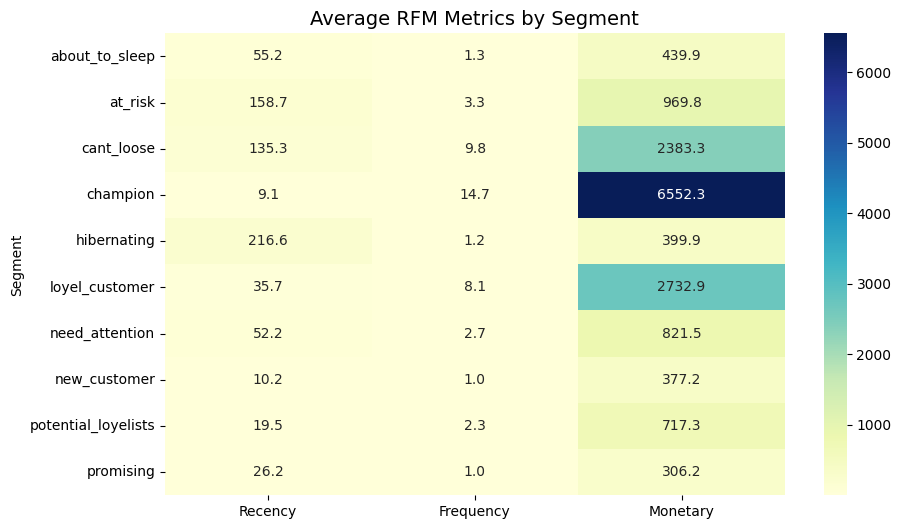

In [38]:
heatmap_data = rfm.groupby('Segment')[['Recency', 'Frequency', 'Monetary']].mean()
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap="YlGnBu", fmt=".1f")
plt.title("Average RFM Metrics by Segment", fontsize=14)
plt.show()

In [39]:
plt.savefig('rfm_segments.png', dpi=300, bbox_inches='tight')

<Figure size 640x480 with 0 Axes>